# 词袋模型

词袋模型（Bag of Words，简称 BoW）是自然语言处理（NLP）中常用的文本表示方法，它将文本转化为数值特征（向量），进而可以用于机器学习等高阶处理。词袋模型将语料转化为二维矩阵，横向为所有在训练数据中出现的不重复的词汇（word），纵向为语料各句子或文档（document）。

简单来说，词袋模型可以帮助大家计算词频。

In [2]:
# 导入数据
import pandas as pd
text_ana = pd.read_excel('text_analysis_twitter_sample.xlsx')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client
...,...,...,...,...,...,...,...
495,108175,905927436315086848,JeffFortenberry,2017-09-07T18:55:06-04:00,https://www.twitter.com/JeffFortenberry/status...,Great conversation with presidential historian...,Twitter Web Client
496,157423,915340759154409472,FlakeforSenate,2017-10-03T18:20:17-04:00,https://www.twitter.com/FlakeforSenate/statuse...,ICYMI over the weekend: @JeffFlake teams up wi...,TweetDeck
497,72173,896489606316773376,RepSeanMaloney,2017-08-12T17:52:32-04:00,https://www.twitter.com/RepSeanMaloney/statuse...,one of America's most beautiful &amp; welcomin...,Twitter for iPhone
498,232181,927641544819081216,ChrisMurphyCT,2017-11-06T15:59:13-05:00,https://www.twitter.com/SenatorDurbin/statuses...,RT @SenatorDurbin 94% of Americans (93% of gun...,Twitter for iPhone


## 数据预处理

In [3]:
import re

def preprocess_text(text):
    # 转换为小写
    text = text.lower()   

    # # 移除URL
    # text = re.sub(r'http\S+', '', text)
    # # 移除特殊字符和数字
    # text = re.sub(r'[^a-zA-Z\s]', '', text)
    # # 移除多余的空格
    # text = re.sub(r'\s+', ' ', text).strip()
    # 移除停用词
    stop_words = set(['to', 'the', 'com', 'http', 'https'])
    # print(text)
    text = ' '.join([word for word in text.split() if word not in stop_words])  # 移除停用词      # 移除停用词
    # print(text)
    
    return text

In [4]:
text_ana["text"].apply(preprocess_text)

0      rt @reuters more: top u.s. general says, given...
1      t-minus 2 days until our first-ever last best ...
2      please know that help is available. visit http...
3      literally flying wings off a-10 in fight again...
4      today house unanimously passed my bill #hr2156...
                             ...                        
495    great conversation with presidential historian...
496    icymi over weekend: @jeffflake teams up with a...
497    one of america's most beautiful &amp; welcomin...
498    rt @senatordurbin 94% of americans (93% of gun...
499    rt @vvamerica "the #forevergibill shows just h...
Name: text, Length: 500, dtype: object

In [5]:
# len(text_ana)
text_ana.shape

(500, 7)

## 构建词袋模型

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out()[:100])

词袋特征矩阵的形状: (500, 4510)
特征词列表: ['00' '000' '00am' '02' '05' '06' '07' '08' '08367830' '08mwbzgzpbadzr4n'
 '09' '10' '100' '100000109396810' '100th' '101' '10155125613787887' '106'
 '1060067645' '107036968' '1073741828' '10thamendment' '11'
 '1123972717735492' '115' '115809' '118' '11e7' '12' '126' '1280x720' '13'
 '1386' '14' '1404' '1482072055195317' '14th' '15' '1502395949813553'
 '153' '15am' '15k' '16' '17' '1711960602149862' '18' '180' '188' '1888'
 '189' '19' '194' '1941' '1942' '1948' '1967' '1979' '1982' '1984'
 '1a3c1db5e5' '1hqvh4' '1october' '1st' '1v6zn8t' '20' '200' '2017'
 '20170902' '20170905' '20171102' '20171122' '2018' '20paulsen' '20t'
 '20th' '21airract' '21st' '22' '226' '231' '232' '245' '247' '25' '26'
 '2632053' '2638138' '26a31a55e5bd' '27' '274337' '27t' '27we' '28' '28am'
 '29' '2asp8ly' '2asprmx' '2bsuxfa' '2dmetno' '2eexth2']


In [7]:
len(vectorizer.get_feature_names_out())

4510

In [8]:
X

<500x4510 sparse matrix of type '<class 'numpy.int64'>'
	with 13378 stored elements in Compressed Sparse Row format>

In [9]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dt

## 词频统计

In [10]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()
feature_words.shape

(4510,)

In [11]:
X.sum(axis=0).A1

array([2, 4, 1, ..., 1, 1, 1], dtype=int64)

In [12]:
list(zip(feature_words, X.sum(axis=0).A1))

[('00', 2),
 ('000', 4),
 ('00am', 1),
 ('02', 3),
 ('05', 3),
 ('06', 1),
 ('07', 6),
 ('08', 9),
 ('08367830', 1),
 ('08mwbzgzpbadzr4n', 1),
 ('09', 6),
 ('10', 21),
 ('100', 4),
 ('100000109396810', 1),
 ('100th', 1),
 ('101', 1),
 ('10155125613787887', 1),
 ('106', 1),
 ('1060067645', 1),
 ('107036968', 1),
 ('1073741828', 1),
 ('10thamendment', 1),
 ('11', 13),
 ('1123972717735492', 1),
 ('115', 1),
 ('115809', 1),
 ('118', 1),
 ('11e7', 4),
 ('12', 7),
 ('126', 1),
 ('1280x720', 4),
 ('13', 2),
 ('1386', 1),
 ('14', 2),
 ('1404', 1),
 ('1482072055195317', 1),
 ('14th', 1),
 ('15', 5),
 ('1502395949813553', 1),
 ('153', 1),
 ('15am', 1),
 ('15k', 1),
 ('16', 1),
 ('17', 4),
 ('1711960602149862', 1),
 ('18', 3),
 ('180', 1),
 ('188', 1),
 ('1888', 1),
 ('189', 1),
 ('19', 2),
 ('194', 1),
 ('1941', 1),
 ('1942', 1),
 ('1948', 1),
 ('1967', 1),
 ('1979', 1),
 ('1982', 1),
 ('1984', 1),
 ('1a3c1db5e5', 1),
 ('1hqvh4', 1),
 ('1october', 1),
 ('1st', 2),
 ('1v6zn8t', 1),
 ('20', 5),
 (

In [13]:
# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))
word_freq

{'00': 2,
 '000': 4,
 '00am': 1,
 '02': 3,
 '05': 3,
 '06': 1,
 '07': 6,
 '08': 9,
 '08367830': 1,
 '08mwbzgzpbadzr4n': 1,
 '09': 6,
 '10': 21,
 '100': 4,
 '100000109396810': 1,
 '100th': 1,
 '101': 1,
 '10155125613787887': 1,
 '106': 1,
 '1060067645': 1,
 '107036968': 1,
 '1073741828': 1,
 '10thamendment': 1,
 '11': 13,
 '1123972717735492': 1,
 '115': 1,
 '115809': 1,
 '118': 1,
 '11e7': 4,
 '12': 7,
 '126': 1,
 '1280x720': 4,
 '13': 2,
 '1386': 1,
 '14': 2,
 '1404': 1,
 '1482072055195317': 1,
 '14th': 1,
 '15': 5,
 '1502395949813553': 1,
 '153': 1,
 '15am': 1,
 '15k': 1,
 '16': 1,
 '17': 4,
 '1711960602149862': 1,
 '18': 3,
 '180': 1,
 '188': 1,
 '1888': 1,
 '189': 1,
 '19': 2,
 '194': 1,
 '1941': 1,
 '1942': 1,
 '1948': 1,
 '1967': 1,
 '1979': 1,
 '1982': 1,
 '1984': 1,
 '1a3c1db5e5': 1,
 '1hqvh4': 1,
 '1october': 1,
 '1st': 2,
 '1v6zn8t': 1,
 '20': 5,
 '200': 1,
 '2017': 43,
 '20170902': 1,
 '20170905': 1,
 '20171102': 1,
 '20171122': 1,
 '2018': 2,
 '20paulsen': 1,
 '20t': 1,
 '20

In [14]:
word_freq.items()

dict_items([('00', 2), ('000', 4), ('00am', 1), ('02', 3), ('05', 3), ('06', 1), ('07', 6), ('08', 9), ('08367830', 1), ('08mwbzgzpbadzr4n', 1), ('09', 6), ('10', 21), ('100', 4), ('100000109396810', 1), ('100th', 1), ('101', 1), ('10155125613787887', 1), ('106', 1), ('1060067645', 1), ('107036968', 1), ('1073741828', 1), ('10thamendment', 1), ('11', 13), ('1123972717735492', 1), ('115', 1), ('115809', 1), ('118', 1), ('11e7', 4), ('12', 7), ('126', 1), ('1280x720', 4), ('13', 2), ('1386', 1), ('14', 2), ('1404', 1), ('1482072055195317', 1), ('14th', 1), ('15', 5), ('1502395949813553', 1), ('153', 1), ('15am', 1), ('15k', 1), ('16', 1), ('17', 4), ('1711960602149862', 1), ('18', 3), ('180', 1), ('188', 1), ('1888', 1), ('189', 1), ('19', 2), ('194', 1), ('1941', 1), ('1942', 1), ('1948', 1), ('1967', 1), ('1979', 1), ('1982', 1), ('1984', 1), ('1a3c1db5e5', 1), ('1hqvh4', 1), ('1october', 1), ('1st', 2), ('1v6zn8t', 1), ('20', 5), ('200', 1), ('2017', 43), ('20170902', 1), ('20170905',

In [15]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('com', 440),
 ('http', 366),
 ('twimg', 280),
 ('pbs', 245),
 ('jpg', 241),
 ('of', 237),
 ('media', 222),
 ('https', 206),
 ('and', 201),
 ('in', 190),
 ('for', 187),
 ('on', 138),
 ('rt', 135),
 ('is', 111),
 ('amp', 100),
 ('our', 92),
 ('you', 89),
 ('with', 83),
 ('we', 82),
 ('twitter', 79),
 ('www', 79),
 ('this', 74),
 ('status', 73),
 ('at', 71),
 ('it', 62),
 ('qt', 62),
 ('be', 54),
 ('my', 54),
 ('tax', 52),
 ('that', 50),
 ('are', 48),
 ('house', 48),
 ('trump', 47),
 ('as', 46),
 ('from', 46),
 ('2017', 43),
 ('by', 43),
 ('have', 42),
 ('ly', 41),
 ('video', 40),
 ('who', 40),
 ('today', 38),
 ('not', 37),
 ('will', 37),
 ('bill', 36),
 ('gov', 35),
 ('bit', 33),
 ('us', 33),
 ('here', 32),
 ('new', 32),
 ('your', 32),
 ('all', 30),
 ('news', 29),
 ('an', 28),
 ('mp4', 28),
 ('about', 27),
 ('congress', 27),
 ('health', 27),
 ('thank', 27),
 ('their', 27),
 ('what', 27),
 ('more', 26),
 ('must', 26),
 ('get', 25),
 ('has', 25),
 ('he', 25),
 ('need', 25),
 ('senate', 2

## 词云图

In [16]:
pip install wordcloud

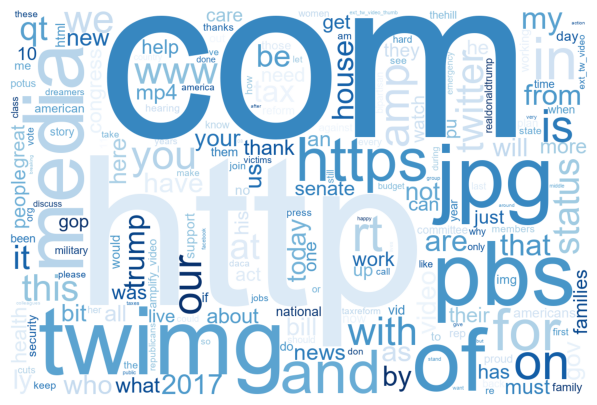

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, height=800
    , max_words=200
    # , max_font_size=100
    , colormap='Blues'
    , background_color='white'
    , font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()